# ENSAYO

La práctica de la mita fue un sistema de trabajo arduo y forzoso que, en consecuencia, afectó la calidad de vida de la población. En el presente texto, la autora busca desarrollar una respuesta a la siguiente pregunta: ¿Cuáles fueron los efectos a largo plazo de esta práctica colonial, como la reducción del consumo en hogares y el retraso en el crecimiento de los niños?

La principal fortaleza de este artículo es que brinda un análisis multidimensional del enfoque en el impacto de la mita mostrados en la regresión para comprender la calidad de vida. Sin embargo, la debilidad qeu presenta es que toma toda el área geográfica como una sola, sin tener en consideración las distinciones entre las regiones incluidas; ello, considero, resulta perjudicial, ya que pudo permitir un análisis más detallado y un contraste sobre si el resultado es el mismo en todas las regiones consideradas o identificar otros factores que estén involucrados.

Pese a todo, el principal avance de este trabajo es que permite concientizar sobre las consecuencias a largo plazo de la mita en la zona andina y vizualizar variables importantes sobre la calidad de vida humana.

Para concluir, como ya se mencionó, el siguiente paso a seguir para avanzar esta pregunta sería profundizar y enfocar el análisis en las diferentes regiones consideradas. Además, focalizar el estudio en futuras políticas que prevengan este tipo de problemas en fuentes mineras actuales.

# CODIFICACIÓN

**Colaboradores:**

Ingry Benel (20191301)

Daniel Cubeñas (20170718)

In [4]:
#Antes de pasar a la parte de códigos en Python, procederemos a instalar las librerías correspondientes
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

ModuleNotFoundError: No module named 'plotnine'

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib
import string
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [6]:
import matplotlib.pyplot as plt

In [7]:
pip install causalgraphicalmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel

In [10]:
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

ModuleNotFoundError: No module named 'plotnine'

**1. Instrumental Variables**

***CONCEPTOS***

Para que las variables instrumentales funcionen, debemos satisfacer dos supuestos: relevancia del instrumento y validez del instrumento.

La **relevancia** es bastante sencilla. La idea de las variables instrumentales es que usamos la parte de X, el tratamiento, que se explica por Z, el instrumento. Aunque si ninguna parte de X se explica por Z; las variables instrumentales no funcionan. Así que tenemos que estar seguros de que Z en realidad se relaciona con X. Basta con mirar la relación entrey X y Z mira lo fuerte que es. Cuanto más fuerte sea, más confianza tendrá en la suposición de relevancia y menos saltará la estimación de una muestra a otra.

Quizás el más tenso de los dos supuestos es el supuesto de validez . La validez es, en efecto, la suposición de que el instrumento Z es una variable que no tiene puertas traseras abiertas propias. En otras palabras, en una relación, Z→X→Y, ? No tenemos que identificar Z→X, solo necesitamos que no haya forma de salir de Z a Y excepto a través X. Cualquier ruta (path) entre el instrumento y el resultado debe pasar por el tratamiento o cerrarse.

**2. Ploteo de Histogramas**

In [11]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

data = read_data("card.dta")
data.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


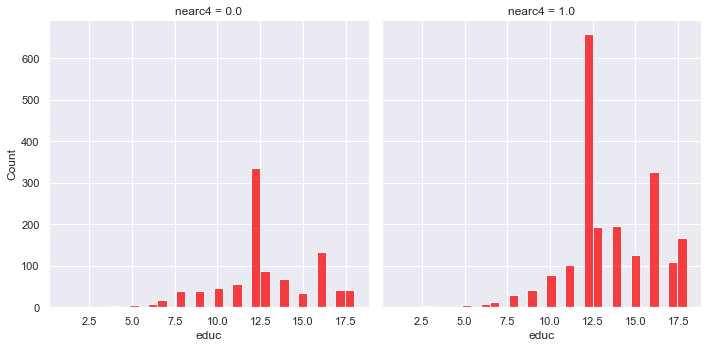

In [12]:
sns.displot(data, x = "educ", col = "nearc4", color='red')

Intuición:

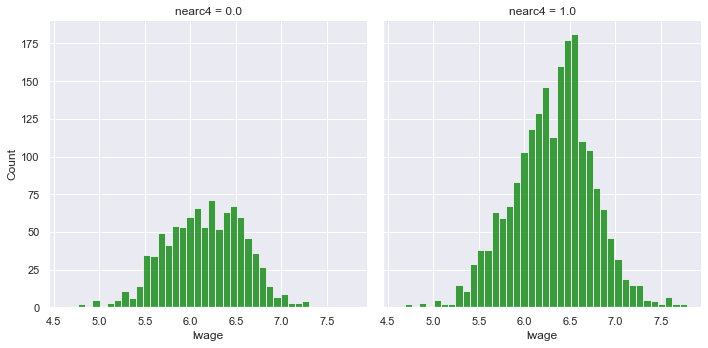

In [13]:
sns.displot(data, x = "lwage", col = "nearc4", color='green')

**Intuición:**



**3. Regresiones**

In [14]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = data).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        02:14:57   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Intuición:**

El modelo de regresión logísitco seguro (OLS) es significativo y, expresado de manera logarítimica, explica un 30.3% la variabilidad de la variable ingreso "lwage".

De esta manera, todas las variables analizadas previamente son significativas debido a que presentan un p.value menor a 0.05:

**Observaciones:**

1. Por cada año adicional de educación, el nivel de ingreso aumentará en 0.07 unidades logaritmicas.

2. Por cada año de experiencia laboral. el nivel de ingreso aumenta en 0.03 unidades logaritmicas.

3. Si el individuo es afroamericano, el nivel de ingreso se reduce en 0.17 unidades logaritmicas

4. Si el individuo es del sur, se reduce en 0.13 unidades logaritmicas.

5. Si el individuo está casado, se reduce en 0.03 unidades logaritmicas.

6. Si vive en SMSA, aumenta en 0.18 unidades logaritmicas.

In [15]:
# There are null values in the dataset, we will fill them with 0
data['married'] = data['married'].fillna(0)

<AxesSubplot:xlabel='nearc2', ylabel='Count'>

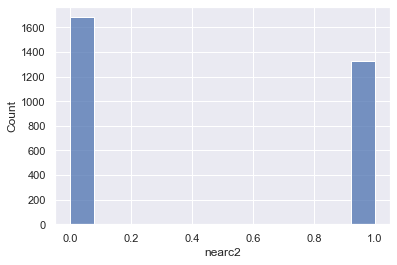

In [16]:
sns.histplot(data=data, x="nearc2")

In [9]:
#llenamos los casos de 0 en married, para que la función corra#
data['married'] = data['married'].fillna(0)

NameError: name 'data' is not defined

In [10]:
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS

ModuleNotFoundError: No module named 'linearmodels'

In [11]:
iv_reg2 = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", data).fit()
iv_reg2.summary

NameError: name 'IV2SLS' is not defined

**Intuición:**

El modelo de regresión logístico seguro (OLS) es significativo y ,  expresado de manera logarítimica, explica un 1.3% la variabilidad de la variable ingreso "lwage". El instrumento "near2" no es débil.

No obstante, no todas las variables analizadas previamente son significativas, debido a que no todas presentan un p.value menor a 0.05. Por lo que solo tomamos en cuenta la variable de experiencia laboral.

**Observaciones:**

El nivel de ingreso aumenta en 0.15 unidades logarítmicas por cada año de experiencia laboral.